In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ccxt
import os
import statistics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

In [25]:
location = 'C:/Users/Carter Carlson/Documents/Crypto/'
historical_data = pd.read_csv(location + 'backtests/historical prices.csv')
coins = historical_data.columns.values[1:]
file1 = pd.read_csv(location + 'backtests/10/10_HODL.csv')
file2 = pd.read_csv(location + 'backtests/10/10_rebalanced.csv')

dates = historical_data['date'].tolist()

In [26]:
hodl = np.array(file1[file1.columns[1:]])
rebalance = np.array(file2[file2.columns[1:]])

df = pd.DataFrame(columns=coins)

# Add HODL and rebalance end price as feature
df['end_hodl'] = hodl[len(hodl) - 1]
df['end_rebalance'] = rebalance[len(rebalance) - 1]
df['performance'] = (df['end_rebalance'] - df['end_hodl']) / df['end_hodl']

df.loc[df['performance'] > 0, 'beat market'] = 1
df.loc[df['performance'] <= 0, 'beat market'] = 0

In [28]:
df[coins] = 0

cols = file1.columns.values[1:]
coin_lists = [lst.split('-') for lst in cols]

# fill in dataframe with coins used for each simulation
for i in range(len(coin_lists)):
    for coin in coin_lists[i]:
        df.loc[i, coin] = 1

In [29]:
tree = RandomForestClassifier()
X = df[coins]
Y = df['beat market']
tree.fit(X, Y)

# Histogram of feature importance
feature_importance = tree.feature_importances_
feature_importance = 100 * (feature_importance / max(feature_importance))
temp = feature_importance.tolist()
top_feats = sorted(feature_importance, reverse=True)[:10]
sorted_features = np.array([temp.index(feat) for feat in top_feats])
pos = np.arange(sorted_features.shape[0]) + 0.5

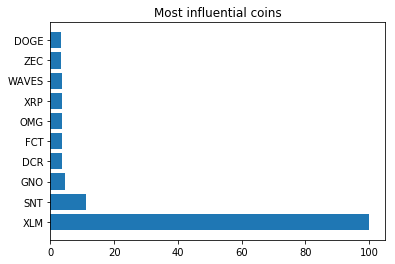

In [36]:
plt.barh(pos, feature_importance[sorted_features], align='center')
plt.yticks(pos, X.columns[sorted_features])
plt.title('Most influential coins')
plt.show()

In [51]:
#Find simulations that included and did not include XLM
xlm_yes = [s for s in file1.columns.values[1:] if 'XLM' in s]
xlm_no = [s for s in file1.columns.values[1:] if 'XLM' not in s]

# Make one dataset with XLM and one dataset without XLM - compare performance
xlm_yes_df = file1[xlm_yes]
xlm_no_df = file1[xlm_no] 

titles = ['Simulations with XLM', 'Simulations w/out XLM']

file3 = pd.read_csv(location + 'backtests/10/10_summary.csv'_)
for a in [xlm_yes_df, xlm_no_df]:
    diffs = a['end_price_rebalanced']